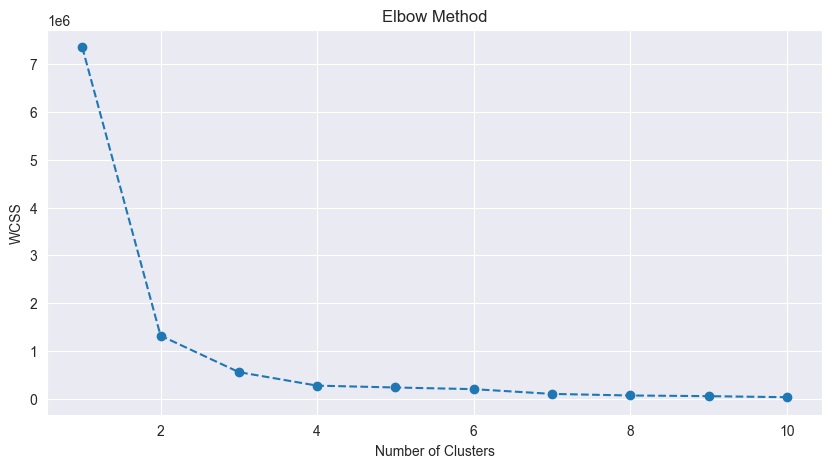

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('../data/processed/cleaned_data.csv')
X = df[['Age', 'Purchase_Amount']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

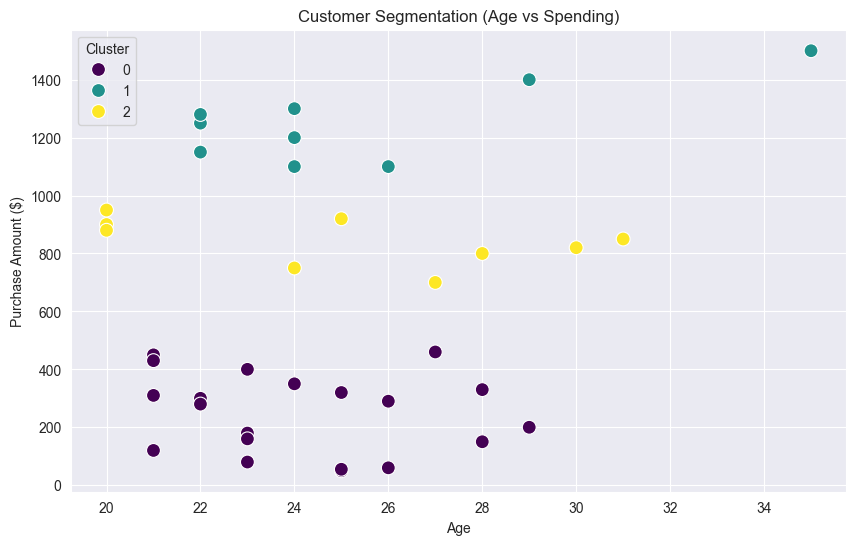

In [2]:
import seaborn as sns

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Purchase_Amount', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation (Age vs Spending)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount ($)')
plt.legend(title='Cluster')
plt.show()

In [3]:
cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Purchase_Amount': 'mean',
    'Customer_ID': 'count'
}).rename(columns={'Customer_ID': 'Customer_Count'})

print(cluster_analysis)

df.to_csv('../data/processed/customer_segments.csv', index=False)

               Age  Purchase_Amount  Customer_Count
Cluster                                            
0        24.150000       248.750000              20
1        25.333333      1253.333333               9
2        25.000000       841.111111               9


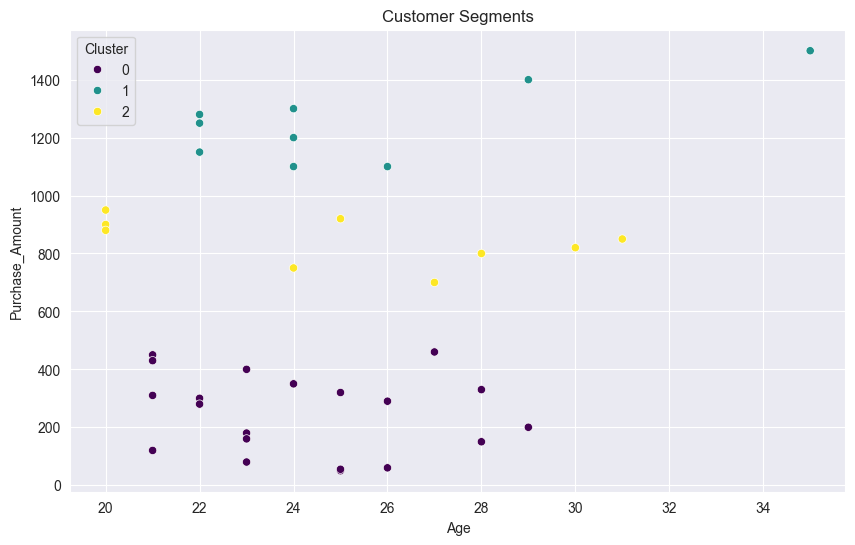

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('../data/processed/customer_segments.csv')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Purchase_Amount', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.savefig('../reports/figures/customer_clusters.png')
plt.show()